In [3]:
!pip install hdbscan

  Using cached hdbscan-0.8.29.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build hdbscan


  error: subprocess-exited-with-error
  
  × Building wheel for hdbscan (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\hdbscan
      copying hdbscan\flat.py -> build\lib.win-amd64-cpython-39\hdbscan
      copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-39\hdbscan
      copying hdbscan\plots.py -> build\lib.win-amd64-cpython-39\hdbscan
      copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-39\hdbscan
      copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-39\hdbscan
      copying hdbscan\validity.py -> build\lib.win-amd64-cpython-39\hdbscan
      copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-39\hdbscan
      creating build\lib.win-amd64-cpython-39\hdbscan\tests
      copying hdbscan\tests\test_flat.py -> build\

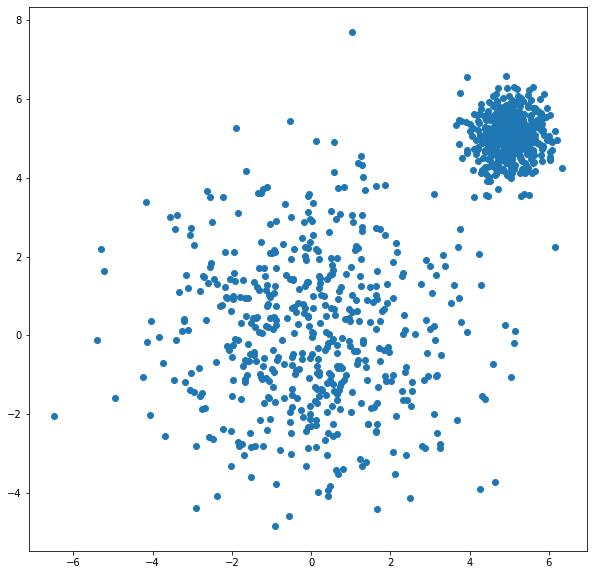

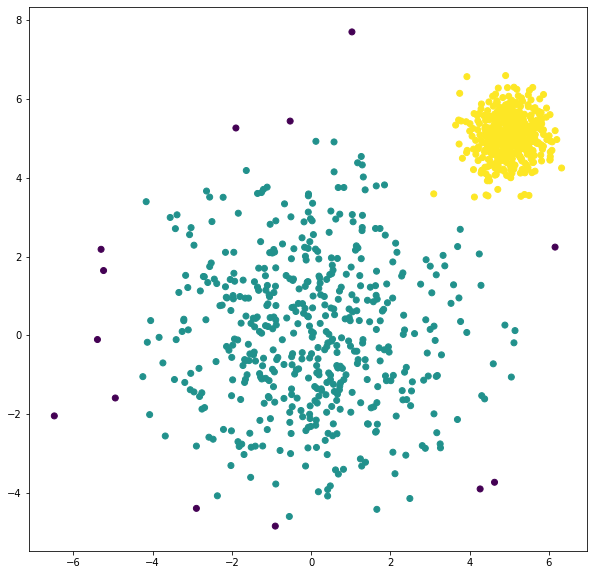

In [1]:
from sklearn.datasets import make_blobs
import hdbscan
import matplotlib.pyplot as plt

N_SAMPLES = 1000
RANDOM_STATE = 42
X, y = make_blobs(n_samples=N_SAMPLES,
                  cluster_std=[2.0, 0.5],
                  centers=[(0, 0), (5, 5)],
                  random_state=RANDOM_STATE)

plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

hclusterer = hdbscan.HDBSCAN(min_cluster_size=5).fit(X)

plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c = hclusterer.labels_)
plt.show()

### 使用糖尿病資料

In [3]:
import pandas as pd
raw_features = pd.read_csv('1011 KNN 15 features.csv')
raw_features_list = raw_features['features'].tolist()
df = pd.read_csv('0923 preprocess_33W.csv')

In [12]:
from collections import Counter

X = df[raw_features_list]
y = df['diabetes']
y = y.replace(2,1)
print(Counter(y))

Counter({1: 184420, 0: 38973})


In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
# XX = pca.fit(X.iloc[:,9:]).transform(X.iloc[:,9:])
XX = pca.fit(X).transform(X)
XX

array([[ 2.38707233,  4.12027185],
       [14.38007023,  0.40384527],
       [14.38007634,  0.40380944],
       ...,
       [-6.63728856, -2.06479219],
       [-6.63706351, -2.06525803],
       [ 2.36385331, -0.46605344]])

In [14]:
# 定義可視化參數
from pylab import rcParams
%matplotlib inline 
rcParams["figure.figsize"] =20,10

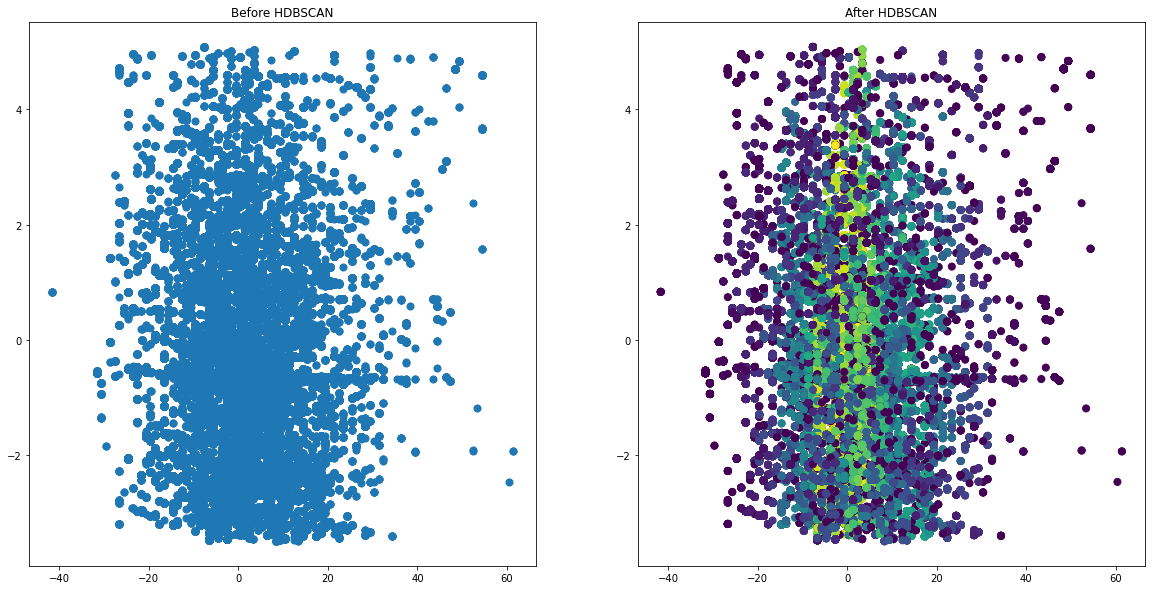

In [15]:
import matplotlib.pyplot as plt
import hdbscan
# plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.scatter(XX[:, 0], XX[:, 1],s=50)
plt.title('Before HDBSCAN')

hclusterer = hdbscan.HDBSCAN(min_cluster_size=5).fit(X)

# plt.figure(figsize = (10, 10))
plt.subplot(1,2,2)
plt.scatter(XX[:, 0], XX[:, 1], c=hclusterer.labels_, s=50)
plt.title('After HDBSCAN')
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_1132/3648955503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HDBSCAN'] = new_hclusterer.tolist()


denoise df : 220212


No handles with labels found to put in legend.


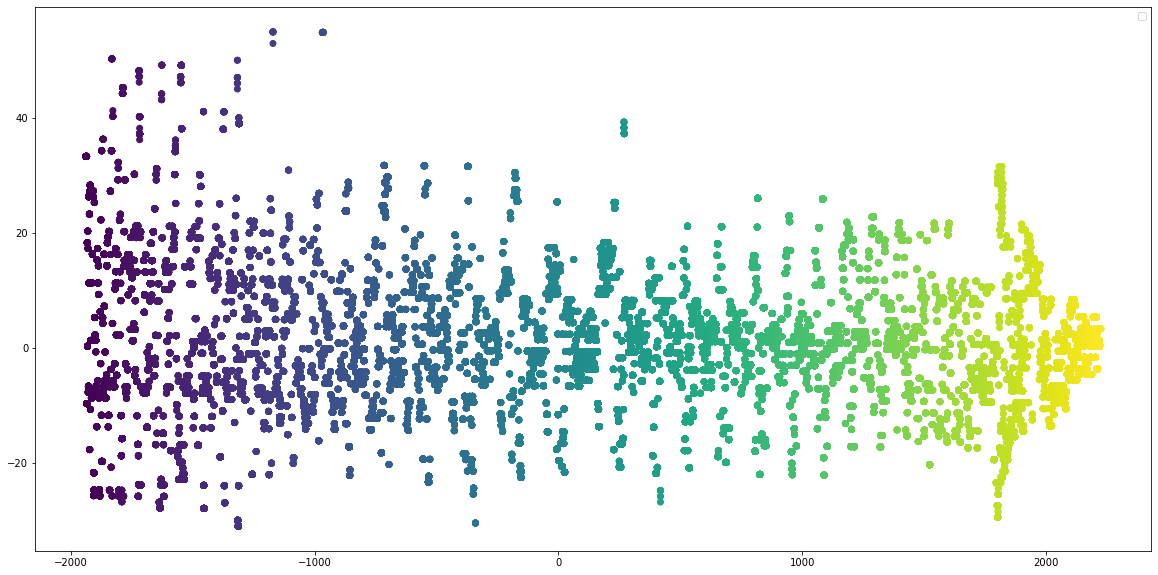

In [66]:
new_hclusterer = hclusterer.labels_
X['HDBSCAN'] = new_hclusterer.tolist()
# df

df_clean_noise_cluster_XXX = X[X.HDBSCAN != -1]
print('denoise df :', len(df_clean_noise_cluster_XXX))
# denoise label
denoise_df_label_XXX = df_clean_noise_cluster_XXX['HDBSCAN'].to_numpy()

# denoise df 
df_clean_noise_cluster_XXX.drop('HDBSCAN', axis=1)

pca=PCA(n_components=2)
denoise_df_XXX = pca.fit(df_clean_noise_cluster_XXX).transform(df_clean_noise_cluster_XXX)
# denoise_df_X

# hclusterer_XXX = hdbscan.HDBSCAN(min_cluster_size=5).fit(df_clean_noise_cluster_XXX)

plt.figure(figsize = (20, 10))
plt.scatter(denoise_df_XXX[:, 0], denoise_df_XXX[:, 1], c=denoise_df_label_XXX) # denoise_df_label_XXX 
# hclusterer_XXX.labels_
plt.legend()
plt.show()


In [69]:
df.to_csv('1120102 after HDBSCAN.csv', index=None)

In [50]:
print(len(Counter(denoise_df_label_XXX)))
Counter(denoise_df_label_XXX)

3788


Counter({2619: 357,
         3417: 406,
         3205: 623,
         3690: 136,
         3466: 306,
         3774: 510,
         3582: 270,
         2355: 217,
         3609: 200,
         2147: 74,
         2424: 1036,
         3442: 9,
         3070: 17,
         3689: 10,
         3351: 739,
         3710: 372,
         1673: 411,
         1619: 388,
         3046: 11,
         1438: 68,
         2315: 605,
         100: 161,
         2194: 136,
         1749: 2336,
         3712: 9,
         3458: 32,
         1429: 131,
         3537: 133,
         3165: 363,
         1696: 105,
         1277: 192,
         3439: 121,
         1725: 445,
         2441: 12,
         364: 594,
         3108: 122,
         2802: 158,
         3607: 316,
         1750: 195,
         2065: 109,
         3346: 159,
         1768: 104,
         1984: 6,
         2246: 162,
         3655: 42,
         2601: 474,
         2434: 186,
         339: 369,
         1867: 342,
         1850: 123,
         3626: 

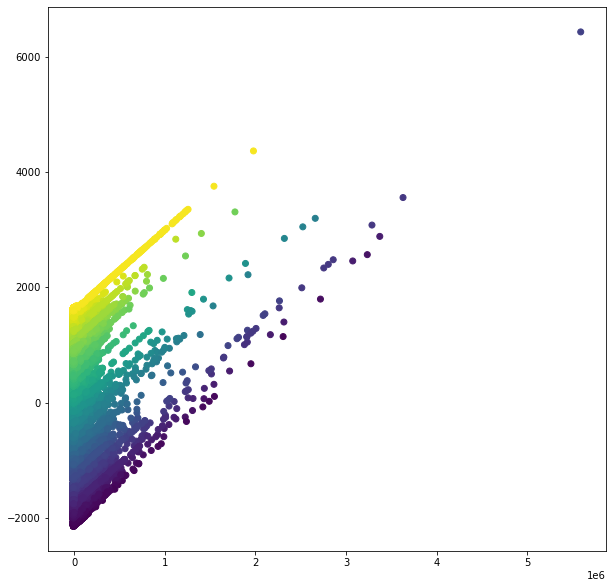

In [23]:
new_hclusterer = hclusterer.labels_
df['HDBSCAN'] = new_hclusterer.tolist()
# df

df_clean_noise_cluster = df[df.HDBSCAN != -1]
# df_clean_noise_cluster
denoise_df_label = df_clean_noise_cluster['HDBSCAN'].to_numpy()
# denoise_df_label
df_clean_noise_cluster.drop('HDBSCAN', axis=1)

pca=PCA(n_components=2)
# XX = pca.fit(X.iloc[:,9:]).transform(X.iloc[:,9:])
denoise_df_X = pca.fit(df_clean_noise_cluster).transform(df_clean_noise_cluster)
# denoise_df_X

plt.figure(figsize = (10, 10))
plt.scatter(denoise_df_X[:, 0], denoise_df_X[:, 1], c=denoise_df_label)
plt.show()

# 原本使用15特徵現在將分群結果移除noise(-1)後，重新加入原本70特徵的資料庫，會發現有很強的分群結果
# 需要將label畫出圖例來

In [29]:
from collections import Counter
Counter(denoise_df_label_XXX)

Counter({2619: 357,
         3417: 406,
         3205: 623,
         3690: 136,
         3466: 306,
         3774: 510,
         3582: 270,
         2355: 217,
         3609: 200,
         2147: 74,
         2424: 1036,
         3442: 9,
         3070: 17,
         3689: 10,
         3351: 739,
         3710: 372,
         1673: 411,
         1619: 388,
         3046: 11,
         1438: 68,
         2315: 605,
         100: 161,
         2194: 136,
         1749: 2336,
         3712: 9,
         3458: 32,
         1429: 131,
         3537: 133,
         3165: 363,
         1696: 105,
         1277: 192,
         3439: 121,
         1725: 445,
         2441: 12,
         364: 594,
         3108: 122,
         2802: 158,
         3607: 316,
         1750: 195,
         2065: 109,
         3346: 159,
         1768: 104,
         1984: 6,
         2246: 162,
         3655: 42,
         2601: 474,
         2434: 186,
         339: 369,
         1867: 342,
         1850: 123,
         3626: 

In [7]:
from collections import Counter
Counter(hclusterer.labels_)

Counter({-1: 14681,
         2619: 357,
         3417: 406,
         3205: 623,
         3690: 136,
         3466: 306,
         3774: 510,
         3582: 270,
         2355: 217,
         3609: 200,
         2147: 74,
         2424: 1036,
         3442: 9,
         3070: 17,
         3689: 10,
         3351: 739,
         3710: 372,
         1673: 411,
         1619: 388,
         3046: 11,
         1438: 68,
         2315: 605,
         100: 161,
         2194: 136,
         1749: 2336,
         3712: 9,
         3458: 32,
         1429: 131,
         3537: 133,
         3165: 363,
         1696: 105,
         1277: 192,
         3439: 121,
         1725: 445,
         2441: 12,
         364: 594,
         3108: 122,
         2802: 158,
         3607: 316,
         1750: 195,
         2065: 109,
         3346: 159,
         1768: 104,
         1984: 6,
         2246: 162,
         3655: 42,
         2601: 474,
         2434: 186,
         339: 369,
         1867: 342,
         1850: 